# Sampling methods implemented in Python

In [1]:
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

## Rejection sampling

$f(x) = \frac{(x - 0.4)^4}{\int_0^1 (x - 0.4)^4 dx}$

C:\Users\maoja\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


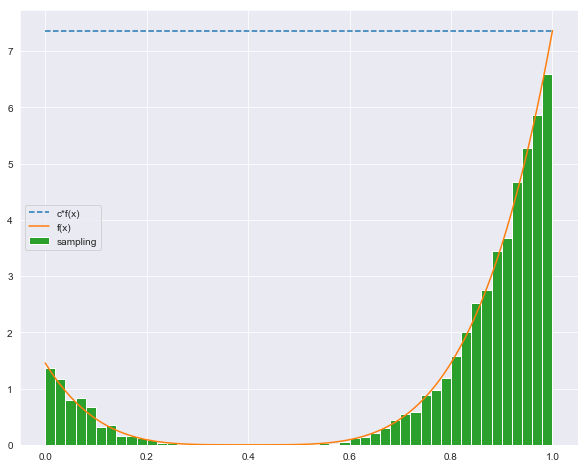

In [2]:
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (10, 8)


def Reject(split_val):
    global c
    global power
    while True:
        x = random.uniform(0, 1)
        y = random.uniform(0, 1)
        
        if y*c <= math.pow(x - split_val, power):
            return x
        

power = 4
t = 0.4
sum_ = (math.pow(1 - t, power + 1) - math.pow(-t, power + 1)) / (power + 1)
x = np.linspace(0, 1, 100)
c = 0.6**4 / sum_
cc = [c for xi in x]
plt.plot(x, cc, '--', label = 'c*f(x)')

y = [math.pow(xi - t, power) / sum_ for xi in x]
plt.plot(x, y, label = 'f(x)')

samples = []
for i in range(10000):
    samples.append(Reject(t))

plt.hist(samples, bins = 50, normed = True, label = 'sampling')
plt.legend()
plt.show()

## Markov chain

[[0.23076935 0.30769244 0.46153864]]


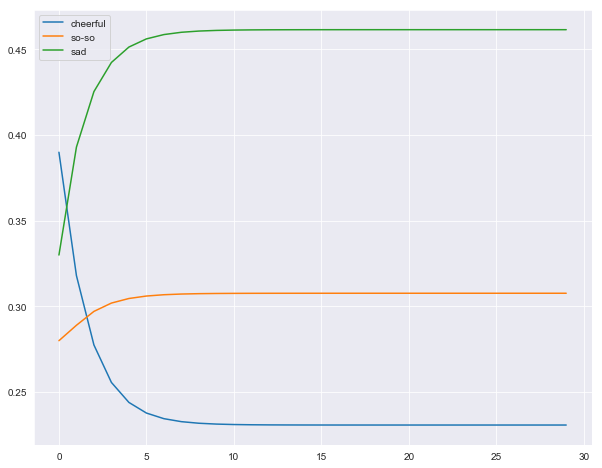

In [3]:
transfer_matrix = np.array([[0.6, 0.2, 0.2], [0.3, 0.4, 0.3], [0, 0.3, 0.7]], dtype = 'float32')
start_matrix = np.array([[0.5, 0.3, 0.2]], dtype = 'float32')

value1 = []
value2 = []
value3 = []

for i in range(30):
    start_matrix = np.dot(start_matrix, transfer_matrix)
    value1.append(start_matrix[0][0])
    value2.append(start_matrix[0][1])
    value3.append(start_matrix[0][2])

print(start_matrix)

x = np.arange(30)
plt.plot(x, value1, label = 'cheerful')
plt.plot(x, value2, label = 'so-so')
plt.plot(x, value3, label = 'sad')
plt.legend()
plt.show()

## Markov chain Monte Carlo (MCMC) with Metropolis-Hastings
Suppose the stationary distribution is $\mathcal{N}$(3, 4) and $Q(i, j)$ is $\mathcal{N}$($i$, 1) on $j$.

C:\Users\maoja\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


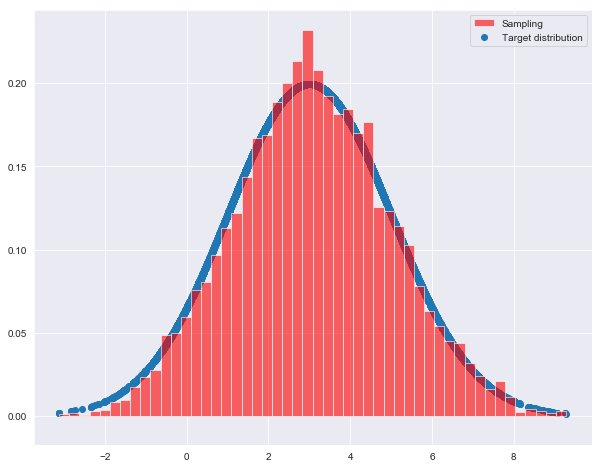

In [4]:
def norm_dist_prob(theta):
    y = norm.pdf(theta, loc = 3, scale = 2)
    return y


T = 10000
pi = [0 for i in range(T)]
sigma = 1
t = 0

while t < T - 1:
    t = t + 1
    pi_star = norm.rvs(loc = pi[t-1], scale = sigma, size = 1, random_state = None)
    alpha = min(1, (norm_dist_prob(pi_star[0]) / norm_dist_prob(pi[t-1])))
    
    u = random.uniform(0, 1)
    if u < alpha:
        pi[t] = pi_star[0]
    else:
        pi[t] = pi[t - 1]

plt. scatter(pi, norm.pdf(pi, loc = 3, scale = 2), label = 'Target distribution')
num_bins = 50
plt.hist(pi, num_bins, normed = 1, facecolor = 'red', alpha = 0.6, label = 'Sampling')
plt.legend()
plt.show()

## Gibbs sampling

Suppose we want to sample from $\mathcal{N}(\mu, \sum)$ where $\mu = (\mu_1, \mu_2) = (5, -1)$ and
$\sum = \begin{pmatrix} 
\sigma_1^2 & \rho\sigma_1\sigma_2 \\
\rho\sigma_1\sigma_2 & \sigma_2^2 
\end{pmatrix} = \begin{pmatrix} 
1 & 1 \\
1 & 4 
\end{pmatrix}$. <br/>

The conditional probability distributions are: <br/>
$p(x_1 | x_2) = \mathcal{N}(\mu_1 + \rho\sigma_1/\sigma_2(x_2 - \mu_2), \sigma_1^2(1 - \rho^2))$ <br/>
$p(x_2 | x_1) = \mathcal{N}(\mu_2 + \rho\sigma_2/\sigma_1(x_1 - \mu_1), \sigma_2^2(1 - \rho^2))$

C:\Users\maoja\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\maoja\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


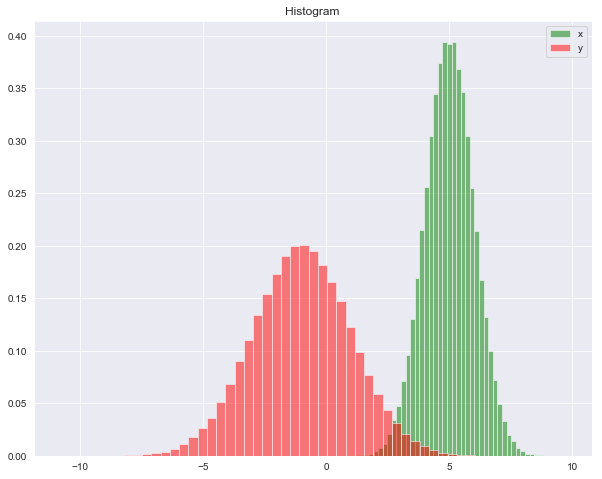

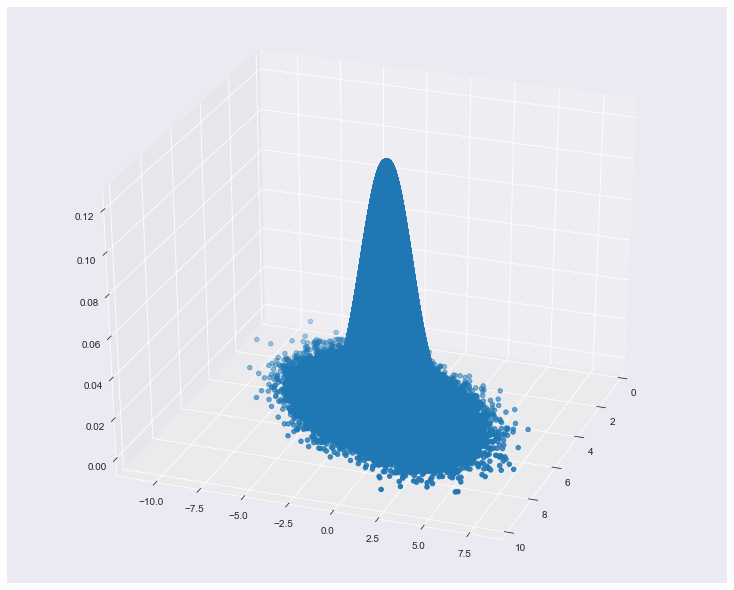

In [5]:
sample_source = multivariate_normal(mean = [5, -1], cov = [[1, 0.5], [0.5, 2]])


def p_ygivenx(x, m1, m2, s1, s2):
    return (random.normalvariate(m2 + rho * s2 / s1 * (x - m1), math.sqrt(1 - rho**2) * s2))


def p_xgiveny(y, m1, m2, s1, s2):
    return (random.normalvariate(m1 + rho * s1 / s2 * (y - m2), math.sqrt(1 - rho**2) * s1))


N = 10000
K = 20
x_res = []
y_res = []
z_res = []
m1 = 5
m2 = -1
s1 = 1
s2 = 2
rho = 0.5
y = m2

for i in range(N):
    for j in range(K):
        x = p_xgiveny(y, m1, m2, s1, s2)
        y = p_ygivenx(x, m1, m2, s1, s2)
        z = sample_source.pdf([x, y])
        x_res.append(x)
        y_res.append(y)
        z_res.append(z)
        
        
num_bins = 50
plt.hist(x_res, num_bins, normed = 1, facecolor = 'green', alpha = 0.5, label = 'x')
plt.hist(y_res, num_bins, normed = 1, facecolor = 'red', alpha = 0.5, label = 'y')
plt.title('Histogram')
plt.legend()
plt.show()

fig = plt.figure()
ax = Axes3D(fig, rect = [0, 0, 1, 1], elev = 30, azim = 20)
ax.scatter(x_res, y_res, z_res)
plt.show()